In [1]:
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
warnings.filterwarnings("ignore")
import networkx as nx
import numpy as np 

In [92]:
dfcy = pd.read_csv('data/Clinical.csv', index_col=0, sep=",")

In [93]:
dfcy

,MM001,MM002,MM003,MM004,MM005,MM006,MM007,MM008,MM009,MM010,...,MM138,MM139,MM140,MM141,MM143,MM144,MM145,MM146,MM147,Unnamed: 139
Diagnosis,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,...,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,Plasma cell leukemia,Plasma cell myeloma,Plasma cell myeloma,Plasma cell myeloma,NaN
Prior_Treatment_Lines_simplified,3+,1,0,1,0,1,1,1,1,1,...,1,1,0,0,1,1,0,0,0,NaN
Treatment_stage,treatment control,treatment control,untreated,relapse/progress,relapse/progress,treatment control,treatment control,relapse/progress,treatment control,treatment control,...,relapse/progress,relapse/progress,untreated,untreated,relapse/progress,relapse/progress,treatment control,untreated,untreated,NaN
Age_At_Sampling,72,63,75,67,72,68,72,49,47,69,...,71,66,86,56,63,62,46,61,49,NaN
Deceased,1,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
Gender,m,f,m,m,m,f,m,m,m,m,...,f,f,m,f,m,m,m,m,m,NaN
Kap_Lam_clonality,Kappa,Kappa,Kappa,Kappa,Kappa,Lambda,Kappa,Kappa,Lambda,Kappa,...,Kappa,Kappa,Lambda,Kappa,Kappa,Kappa,Kappa,Kappa,Kappa,NaN
Ig_Subtype,IgG-Kappa,IgG-Kappa,IgG-Kappa,IgG-Kappa,IgA-Kappa,IgG-Lambda,IgA-Kappa,IgG-Kappa,IgG-Lambda,IgG-Kappa,...,IgA-Kappa,IgG-Kappa,IgG-Lambda,IgG-Kappa,IgG-Kappa,IgA-Kappa,IgG-Kappa,IgG-Kappa,IgG-Kappa,NaN
Clonality,not clonal,clonal,clonal,clonal,clonal,clonal,clonal,clonal,clonal,not clonal,...,clonal,clonal,clonal,clonal,clonal,clonal,clonal,clonal,clonal,NaN
Pathology,NaN,35,45,25,45,12,6,9,90,NaN,...,40,NaN,40,70,NaN,50,31,20,80,NaN


In [37]:
df = pd.read_csv('data/DrugResponse.csv', index_col=0, sep=",")

In [103]:
# Define custom normalization function
def normalize_row(row):
    min_val = row.min(skipna=True)
    max_val = row.max(skipna=True)
    if min_val == max_val:  # If all values in the row are the same
        return row
    return (row - min_val) / (max_val - min_val)

def factorize_(df):
    if (df > 0.7):
        return 'High'
    elif (df >= 0.3):
        return 'Moderate'
    elif (df < 0.3):
        return 'Low'

# Apply normalization function to each row
normalized_df = df.apply(normalize_row, axis=1)
normalized_df = normalized_df.applymap(factorize_)


In [41]:
colr = normalized_df.loc['Bendamustine_DNA-alkylating agent']

In [119]:
colors = {'High': '#AB238C','Moderate': '#27B1A3','Low': '#D2A435', None : 'grey'}


In [120]:
normalized_df.replace(colors, inplace=True)

In [121]:
dict(normalized_df.loc['Elotuzumab+Nivolumab_Immunotherapy'])



{'MM013': 'grey',
 'MM014': 'grey',
 'MM015': 'grey',
 'MM017': 'grey',
 'MM018': 'grey',
 'MM019': 'grey',
 'MM021': 'grey',
 'MM023': 'grey',
 'MM024': 'grey',
 'MM025': 'grey',
 'MM026': 'grey',
 'MM027': 'grey',
 'MM028': 'grey',
 'MM030': 'grey',
 'MM031': 'grey',
 'MM032': 'grey',
 'MM033': 'grey',
 'MM036': 'grey',
 'MM037': 'grey',
 'MM038': 'grey',
 'MM039': 'grey',
 'MM041': 'grey',
 'MM042': 'grey',
 'MM044': 'grey',
 'MM046': 'grey',
 'MM047': 'grey',
 'MM048': 'grey',
 'MM049': 'grey',
 'MM051': 'grey',
 'MM052': 'grey',
 'MM053': 'grey',
 'MM057': 'grey',
 'MM058': 'grey',
 'MM059': 'grey',
 'MM060': 'grey',
 'MM061': 'grey',
 'MM062': 'grey',
 'MM063': 'grey',
 'MM064': 'grey',
 'MM065': 'grey',
 'MM066': 'grey',
 'MM067': 'grey',
 'MM069': 'grey',
 'MM070': 'grey',
 'MM071': '#27B1A3',
 'MM072': '#27B1A3',
 'MM073': '#27B1A3',
 'MM074': '#27B1A3',
 'MM075': '#27B1A3',
 'MM076': '#27B1A3',
 'MM077': '#27B1A3',
 'MM078': '#27B1A3',
 'MM079': '#27B1A3',
 'MM080': '#D2A435'

In [113]:
normalized_df

,MM013,MM014,MM015,MM017,MM018,MM019,MM021,MM023,MM024,MM025,...,MM123,MM125,MM126,MM127,MM129,MM132,MM133,MM135,MM137,MM138
Bendamustine_DNA-alkylating agent,#27B1A3,#27B1A3,#D2A435,#27B1A3,#27B1A3,#27B1A3,#AB238C,#27B1A3,#AB238C,#27B1A3,...,#27B1A3,#AB238C,#27B1A3,#AB238C,#D2A435,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3
Bortezomib_Proteasome Inhibitor regime,#27B1A3,#AB238C,#AB238C,#27B1A3,#D2A435,#D2A435,#27B1A3,#27B1A3,#27B1A3,#27B1A3,...,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#AB238C,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3
Carfilzomib_Proteasome Inhibitor regime,#AB238C,#AB238C,#AB238C,#27B1A3,#27B1A3,#27B1A3,#AB238C,#27B1A3,#27B1A3,#27B1A3,...,#27B1A3,#AB238C,#27B1A3,#27B1A3,#AB238C,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3
Cisplatin_Platinum-containing,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#AB238C,#27B1A3,#27B1A3,#27B1A3,...,#AB238C,#27B1A3,#27B1A3,#AB238C,#27B1A3,#AB238C,#AB238C,#27B1A3,#AB238C,#AB238C
Cyclophosphamide_DNA-alkylating agent,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#AB238C,#AB238C,#27B1A3,...,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexamethasone+Thalidomide_Corticosteroid + IMID,None,None,None,None,None,None,None,None,None,None,...,#AB238C,#27B1A3,#AB238C,#AB238C,None,#27B1A3,#AB238C,#27B1A3,#27B1A3,#27B1A3
Elotuzumab+Ipilimumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,#27B1A3,#27B1A3,#AB238C,#27B1A3,None,#27B1A3,#27B1A3,#27B1A3,#D2A435,#27B1A3
Elotuzumab+Nivolumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,#27B1A3,#AB238C,#AB238C,#D2A435,None,#27B1A3,#27B1A3,#27B1A3,#D2A435,#27B1A3
Elotuzumab+Pembrolizumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,#27B1A3,#AB238C,#27B1A3,#D2A435,None,#27B1A3,#27B1A3,#27B1A3,#27B1A3,#27B1A3


In [102]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

selected_DR = st.selectbox('Select Drug', tuple(normalized_df.index))

plot_drug_response(processed_df, selected_DR)

def plot_drug_response(dat, selected_DR):
    # Assuming you have already imported normalized_df and want to plot the value counts for the specified row and column
    row_data = dat.loc[selected_DR].value_counts()

    # Get a colormap
    colors = cm.viridis(np.linspace(0, 1, len(row_data)))

    # Creating the bar plot
    plt.figure(figsize=(10, 6))
    bars = row_data.plot(kind='bar', color=colors)

    # Adding labels and title
    plt.xlabel('Response Category', fontsize=12)
    plt.ylabel('No. of Patients', fontsize=12)
    plt.title('Response for {selected_DR}', fontsize=14)

    # Adding gridlines
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Display percentage on top of each bar
    for i, v in enumerate(row_data):
        plt.text(i, v + 0.1, f"{(v / row_data.sum() * 100):.2f}%", ha='center', va='bottom', fontsize=10)

    # Display the plot
    plt.xticks(rotation=0, fontsize=12)  # Rotate x-axis labels for better readability
    plt.yticks(fontsize=10)
    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()


NameError: name 'st' is not defined

In [228]:
normalized_df.loc['Bendamustine_DNA-alkylating agent'].value_counts()

Bendamustine_DNA-alkylating agent
Moderate    68
High        26
Low          7
Name: count, dtype: int64

In [32]:
normalized_df

,MM013,MM014,MM015,MM017,MM018,MM019,MM021,MM023,MM024,MM025,...,MM123,MM125,MM126,MM127,MM129,MM132,MM133,MM135,MM137,MM138
Bendamustine_DNA-alkylating agent,Moderate,Moderate,Low,Moderate,Moderate,Moderate,High,Moderate,High,Moderate,...,Moderate,High,Moderate,High,Low,Moderate,Moderate,Moderate,Moderate,Moderate
Bortezomib_Proteasome Inhibitor regime,Moderate,High,High,Moderate,Low,Low,Moderate,Moderate,Moderate,Moderate,...,Moderate,Moderate,Moderate,Moderate,High,Moderate,Moderate,Moderate,Moderate,Moderate
Carfilzomib_Proteasome Inhibitor regime,High,High,High,Moderate,Moderate,Moderate,High,Moderate,Moderate,Moderate,...,Moderate,High,Moderate,Moderate,High,Moderate,Moderate,Moderate,Moderate,Moderate
Cisplatin_Platinum-containing,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,High,Moderate,Moderate,Moderate,...,High,Moderate,Moderate,High,Moderate,High,High,Moderate,High,High
Cyclophosphamide_DNA-alkylating agent,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,High,High,Moderate,...,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dexamethasone+Thalidomide_Corticosteroid + IMID,None,None,None,None,None,None,None,None,None,None,...,High,Moderate,High,High,None,Moderate,High,Moderate,Moderate,Moderate
Elotuzumab+Ipilimumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,Moderate,Moderate,High,Moderate,None,Moderate,Moderate,Moderate,Low,Moderate
Elotuzumab+Nivolumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,Moderate,High,High,Low,None,Moderate,Moderate,Moderate,Low,Moderate
Elotuzumab+Pembrolizumab_Immunotherapy,None,None,None,None,None,None,None,None,None,None,...,Moderate,High,Moderate,Low,None,Moderate,Moderate,Moderate,Moderate,Moderate


In [220]:
selected_DR = st.selectbox('Select Drug', tuple(normalized_df.index))

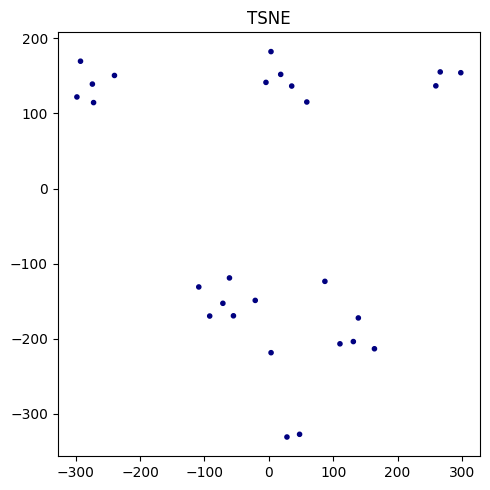

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold
from sklearn.cluster import DBSCAN
import mplcursors

def test_manifold_learning(data, method_names):
    """
    Test different manifold learning methods and plot the results.
    
    Parameters:
        data (array-like): Input data matrix of shape (n_samples, n_features).
        method_names (list): List of names of manifold learning methods to test.
    """
    num_methods = len(method_names)
    fig, axs = plt.subplots(1, num_methods, figsize=(5*num_methods, 5))

    for i, method_name in enumerate(method_names):
        ax = axs[i] if num_methods > 1 else axs
        
        if method_name == 'Isomap':
            embedding = manifold.Isomap(n_neighbors=10, n_components=2).fit_transform(data)
        elif method_name == 'LocallyLinearEmbedding':
            embedding = manifold.LocallyLinearEmbedding(n_neighbors=5, n_components=2, method='standard').fit_transform(data)
        elif method_name == 'TSNE':
            embedding = manifold.TSNE(n_components=2, init='pca', perplexity=2).fit_transform(data)
        elif method_name == 'MDS':
            embedding = manifold.MDS(n_components=2, random_state=42).fit_transform(data)
        elif method_name == 'SpectralEmbedding':
            embedding = manifold.SpectralEmbedding(n_components=2, random_state=42).fit_transform(data)
        # Add more elif blocks for other manifold learning methods as needed

        # Perform DBSCAN clustering
        db = DBSCAN(eps=0.2, min_samples=10).fit(embedding)
        cluster_labels = db.labels_
        
        # Set colors for points based on cluster labels
        num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)  # Exclude noise points
        colors = [plt.cm.jet(each_cluster / float(num_clusters)) for each_cluster in cluster_labels]
        
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], c=colors, marker='.', label=method_name)
        ax.set_title(method_name)
        
        # Enable hovering
        mplcursors.cursor(scatter)
        
    plt.tight_layout()
    plt.show()

# Example usage:
# Generate sample data
np.random.seed(42)
data = np.random.rand(100, 10)  # Sample data with 100 samples and 10 features

# Define manifold learning methods to test
method_names = ['TSNE']

# Test manifold learning methods and plot the results
test_manifold_learning(df.dropna(), method_names)


In [14]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold

n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

In [71]:
dfcy.dropna().transpose()

,CCL19,CXCL13,IL15,MIP-1b,MIP-3a,HGF,GROA,CXCL16,SCF,IL12,...,MMP1,PDGF-bb,MMP2,TGF-b1,RANTES,S100A8,MMP13,ST2,ICAM1,Eotaxin
MM021,0.27,0.58,0.84,0.26,-0.27,-0.12,0.81,1.78,0.86,0.14,...,1.21,1.98,0.21,-2.87,0.93,-0.35,0.52,-0.02,0.48,0.92
MM023,-0.17,0.85,1.06,-0.49,1.06,1.00,0.78,1.26,0.43,-1.48,...,-0.17,0.47,0.57,1.03,0.87,0.69,0.06,0.40,-0.80,0.74
MM025,-0.52,0.26,-0.27,1.44,0.74,0.34,-0.31,-1.01,0.88,-0.99,...,-1.40,-0.07,0.09,0.84,0.55,0.66,-0.69,-1.87,-1.37,-0.04
MM026,1.12,1.54,0.23,2.08,0.08,0.48,-0.65,-0.04,0.72,1.21,...,-0.09,0.35,0.53,0.03,-0.68,0.89,1.79,-0.20,0.32,-0.45
MM027,0.93,1.12,0.55,-0.56,-0.99,0.97,-0.34,0.85,2.22,-0.48,...,-0.15,-0.86,0.30,-0.23,-1.29,-0.52,-0.14,2.25,0.15,-0.67
MM028,-0.28,-1.39,-0.65,-1.17,-1.09,-0.81,-0.39,-0.31,-0.02,0.66,...,-1.41,-1.15,0.58,-1.78,-0.98,-1.99,-0.17,-0.64,-1.33,0.52
MM033,-0.75,-0.28,0.75,-0.97,1.09,0.74,-1.91,-1.81,0.55,-0.23,...,-1.42,-0.81,-0.65,0.52,-2.45,1.11,-0.85,-0.22,0.23,0.13
MM035,0.85,1.22,0.58,-0.55,0.83,-0.86,-0.35,0.95,0.28,0.20,...,-0.58,-0.45,0.39,0.54,0.25,0.62,-0.03,0.77,-0.48,0.62
MM036,-0.37,-0.12,-0.01,0.74,0.36,-0.65,-0.82,1.26,-0.52,0.37,...,0.71,-0.36,1.55,0.84,1.00,0.85,2.20,0.50,-0.84,-0.07
MM037,0.24,-0.50,-0.18,0.03,-0.89,-0.79,-0.84,1.08,-0.77,0.56,...,0.48,-1.28,1.00,-1.71,0.07,-1.76,0.69,-0.14,-0.03,0.71


In [64]:
S_points = df.dropna(axis=0).values
S_color = colr.values

In [51]:
label_encoder = LabelEncoder()
S_color = label_encoder.fit_transform(colr.values)

In [65]:
S_points

array([[-0.1 , -0.05, -0.23, ...,  0.  , -0.02, -0.05],
       [ 0.34,  0.45,  0.65, ...,  0.15,  0.31,  0.21],
       [ 0.48,  0.57,  0.66, ...,  0.19,  0.32,  0.28],
       ...,
       [ 0.55,  0.67,  0.77, ...,  0.27,  0.32,  0.45],
       [ 0.17,  0.48,  0.65, ...,  0.15,  0.3 ,  0.17],
       [ 0.26,  0.59,  0.7 , ...,  0.18,  0.25,  0.25]])

In [48]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

ValueError: too many values to unpack (expected 3)

In [44]:
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

lle_standard = manifold.LocallyLinearEmbedding(method="standard", **params)
S_standard = lle_standard.fit_transform(S_points)

lle_ltsa = manifold.LocallyLinearEmbedding(method="ltsa", **params)
S_ltsa = lle_ltsa.fit_transform(S_points)

lle_hessian = manifold.LocallyLinearEmbedding(method="hessian", **params)
S_hessian = lle_hessian.fit_transform(S_points)

lle_mod = manifold.LocallyLinearEmbedding(method="modified", **params)
S_mod = lle_mod.fit_transform(S_points)

fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(7, 7), facecolor="white", constrained_layout=True
)
fig.suptitle("Locally Linear Embeddings", size=16)

lle_methods = [
    ("Standard locally linear embedding", S_standard),
    ("Local tangent space alignment", S_ltsa),
    ("Hessian eigenmap", S_hessian),
    ("Modified locally linear embedding", S_mod),
]
for ax, method in zip(axs.flat, lle_methods):
    name, points = method
    add_2d_scatter(ax, points, S_color, name)

plt.show()

ValueError: Input X contains NaN.
LocallyLinearEmbedding does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: 'c' argument has 101 elements, which is inconsistent with 'x' and 'y' with size 61.

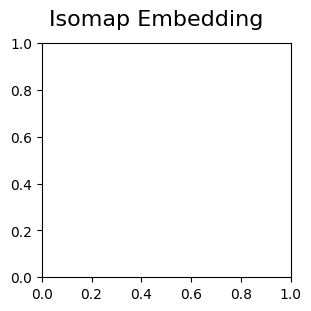

In [55]:
isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Isomap Embedding")

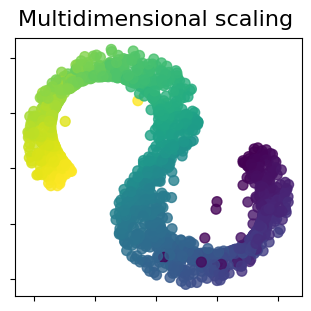

In [20]:
md_scaling = manifold.MDS(
    n_components=n_components,
    max_iter=50,
    n_init=4,
    random_state=0,
    normalized_stress=False,
)
S_scaling = md_scaling.fit_transform(S_points)

plot_2d(S_scaling, S_color, "Multidimensional scaling")

ValueError: 'c' argument has 101 elements, which is inconsistent with 'x' and 'y' with size 61.

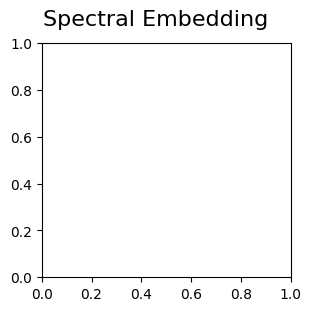

In [54]:
spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors, random_state=42
)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding")

ValueError: 'c' argument has 101 elements, which is inconsistent with 'x' and 'y' with size 61.

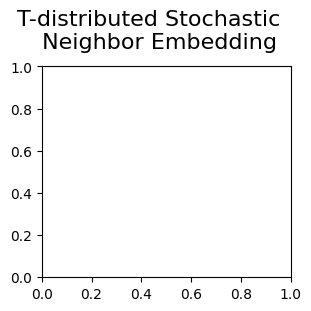

In [53]:
t_sne = manifold.TSNE(
    n_components=n_components,
    perplexity=30,
    init="random",
    n_iter=250,
    random_state=0,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

In [133]:
df = df.corr()

In [134]:
df[abs(df) < 0.5] = 0

In [135]:
df

,MM018,MM019,MM021,MM023,MM025,MM026,MM027,MM028,MM031,MM032,...,MM117,MM118,MM120,MM121,MM125,MM126,MM128,MM129,MM133,MM137
MM018,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM019,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM021,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM023,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
MM025,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MM126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.552199,0.0,0.0
MM128,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.0
MM129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.552199,0.0,1.000000,0.0,0.0
MM133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0


In [ ]:
# Sample clusters (mapping each node to its cluster)
node_clusters = {1: 'A', 2: 'A', 3: 'A', 4: 'B', 5: 'B'}

# Define colors for each cluster
cluster_colors = {'A': 'red', 'B': 'blue'}

# Assign colors to nodes based on clusters
node_colors = [cluster_colors[node_clusters[node]] for node in G.nodes]

# Draw the graph with colored nodes
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500)
plt.show()

In [76]:
for column in df.columns:
        dtype = df[column].dtype
        print(dtype)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [95]:
def process_single_df(df):
    for column in df.columns:
        dtype = df[column].dtype
        if dtype == "object":
            label_encoder = LabelEncoder()
            if type(df[column][0]) == str:
                df[column] = label_encoder.fit_transform(df[column])
        elif dtype in ["int64", "float64"]:
            df = df
        else:
            raise ValueError("TypeError")
    df.replace(to_replace='', value=np.nan, inplace=True)
    df.replace(to_replace='None', value=np.nan, inplace=True)
    df.replace(to_replace='NaN', value=np.nan, inplace=True)
    df.replace(to_replace='na', value=np.nan, inplace=True)
    df.dropna(axis =1, inplace=True)
    df = df.corr(method=custom_mi_reg)  # Example processing, replace with your actual processing logic
    return df

In [8]:
def custom_mi_reg(a, b):
    a = a.reshape(-1, 1)
    b = b.reshape(-1, 1)
    return  mutual_info_regression(a, b)[0] # should return a float value